# Contents
1. Imports
2. Checks
3. Exploring Relationships

# 1. Imports

In [75]:
# Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 

In [76]:
# Path
path = r'/Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling'

In [77]:
# Dataset
df_quality = pd.read_pickle(os.path.join(path, 'data', 'prepared','coffee_quality_cleaned.pkl'))

In [78]:
# Configuration
%matplotlib inline 

# 2. Checks

In [79]:
# Dimensions
df_quality.shape

(945, 21)

In [80]:
# Preview
df_quality.head()

,Species,Continent_of_Origin,Country_of_Origin,Harvest_Year,Expiration,Variety,Color,Processing_Method,Aroma,Flavor,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture,Quakers,Category_One_Defects,Category_Two_Defects
1,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.75,8.67,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
4,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.25,8.50,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2
6,Arabica,South America,Peru,2012-01-01,2013-09-17,Other,Bluish-Green,Washed / Wet,8.42,8.50,...,8.50,8.25,8.25,10.0,10.0,10.0,0.11,0,0,0
9,Arabica,Africa,Ethiopia,2014-01-01,2016-03-29,Other,Green,Natural / Dry,8.08,8.58,...,8.50,7.67,8.42,10.0,10.0,10.0,0.10,0,0,4
18,Arabica,Asia,China,2015-01-01,2017-04-07,Catimor,Green,Washed / Wet,8.42,8.25,...,8.17,7.92,8.00,10.0,10.0,10.0,0.10,0,0,0


# 3. Exploring Relationships

In [81]:
# Column names
df_quality.columns

Index(['Species', 'Continent_of_Origin', 'Country_of_Origin', 'Harvest_Year',
       'Expiration', 'Variety', 'Color', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category_One_Defects',
       'Category_Two_Defects'],
      dtype='object')

## 3.1. Correlation Matrix

In [82]:
# Drop categorical columns
df_matrix = df_quality.drop(columns = ['Species', 'Continent_of_Origin', 'Country_of_Origin', 'Harvest_Year',
       'Expiration', 'Variety', 'Color', 'Processing_Method','Quakers', 'Category_One_Defects',
       'Category_Two_Defects'])

# Correlation matrix
df_matrix.corr()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture
Aroma,1.000000,0.687843,0.631839,0.558277,0.511892,0.563619,0.157327,0.193493,0.083830,-0.055065
Flavor,0.687843,1.000000,0.831670,0.713368,0.653870,0.700998,0.218916,0.282430,0.166396,-0.093089
Aftertaste,0.631839,0.831670,1.000000,0.654850,0.668807,0.746396,0.222753,0.274055,0.166022,-0.136153
Acidity,0.558277,0.713368,0.654850,1.000000,0.594074,0.612437,0.162791,0.163219,0.098677,-0.062145
Body,0.511892,0.653870,0.668807,0.594074,1.000000,0.680047,0.091159,0.123119,0.072401,-0.150665
Balance,0.563619,0.700998,0.746396,0.612437,0.680047,1.000000,0.220631,0.243577,0.154917,-0.174306
Uniformity,0.157327,0.218916,0.222753,0.162791,0.091159,0.220631,1.000000,0.466024,0.428017,0.019086
Clean_Cup,0.193493,0.282430,0.274055,0.163219,0.123119,0.243577,0.466024,1.000000,0.489976,-0.012319
Sweetness,0.083830,0.166396,0.166022,0.098677,0.072401,0.154917,0.428017,0.489976,1.000000,0.024354
Moisture,-0.055065,-0.093089,-0.136153,-0.062145,-0.150665,-0.174306,0.019086,-0.012319,0.024354,1.000000


## 3.2. HeatMap

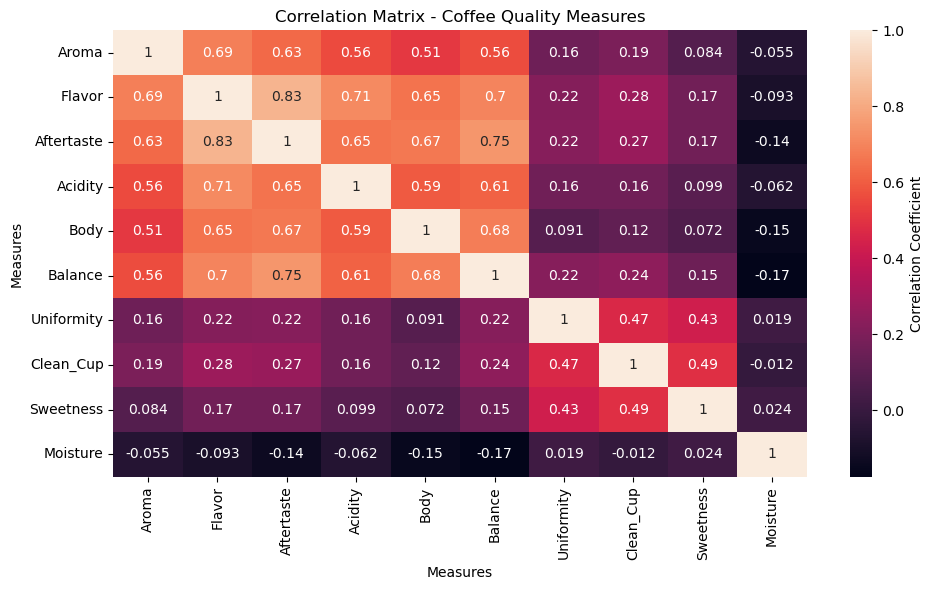

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling/visualisations/correlation_matrix.png


In [84]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate the correlation matrix
corr_matrix = df_matrix.corr()

# Create the heatmap with annotations and a labelled colour bar
sns.heatmap(corr_matrix,
            annot=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax)

# Add labels and title
ax.set_title("Correlation Matrix - Coffee Quality Measures")
ax.set_xlabel("Measures")
ax.set_ylabel("Measures")

# Adjust layout
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, 'visualisations', 'correlation_matrix.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

##### Variables: 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'
- Strong relationship between variables in this group.

##### Variables: 'Uniformity', 'Clean_Cup', 'Sweetness'
- Moderate relationship between variables in this group.

##### Variables: 'Moisture'
- Weak, mostly negative relationship with all other variables in the matrix.<br><br>


## 3.3. Scatterplots

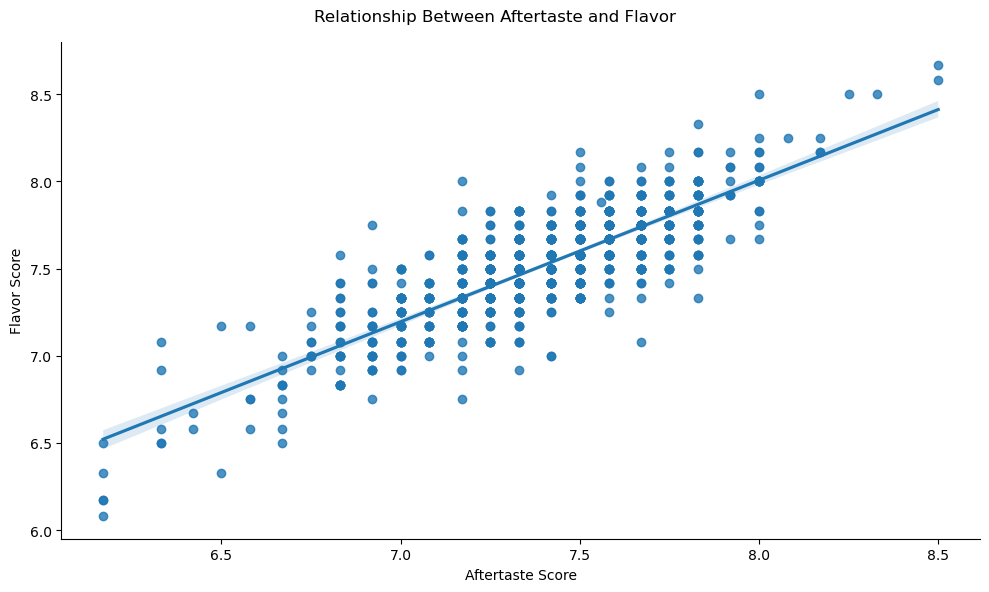

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling/visualisations/scatter_aftertaste_flavor.png


In [88]:
# Aftertaste & Flavor - 0.83

# Create the regression plot
plot = sns.lmplot(x='Aftertaste', y='Flavor', data=df_matrix, height=6, aspect=10/6)

# Add title and axis labels
plot.set_axis_labels("Aftertaste Score", "Flavor Score")
plot.fig.suptitle("Relationship Between Aftertaste and Flavor")
plot.fig.tight_layout()

# Define export path
save_path = os.path.join(path, 'visualisations', 'scatter_aftertaste_flavor.png')

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plot.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

##### Comments
- Strong positive correlation.
- Most points clustered near the line indicating a low degree of variance.<br><br>

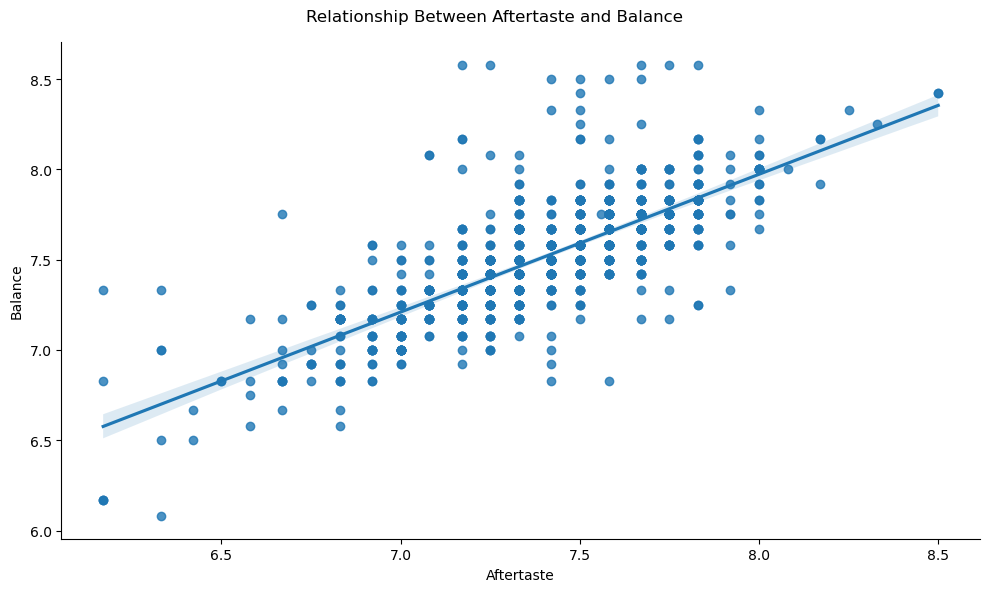

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling/visualisations/scatter_aftertaste_balance.png


In [89]:
# Aftertaste & Flavor - 0.75

# Create the regression plot
plot = sns.lmplot(x='Aftertaste', y='Balance', data=df_matrix, height=6, aspect=10/6)

# Add title and axis labels
plot.set_axis_labels("Aftertaste", "Balance")
plot.fig.suptitle("Relationship Between Aftertaste and Balance")
plot.fig.tight_layout()

# Define export path
save_path = os.path.join(path, 'visualisations', 'scatter_aftertaste_balance.png')

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plot.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

##### Comments
- Strong positive correlation.
- Many points clustered near the line indicating a low degree of variance.
- There are some outliers, with more points falling below the line. This means that the Balance can score high while Aftertaste scores low.<br><br>

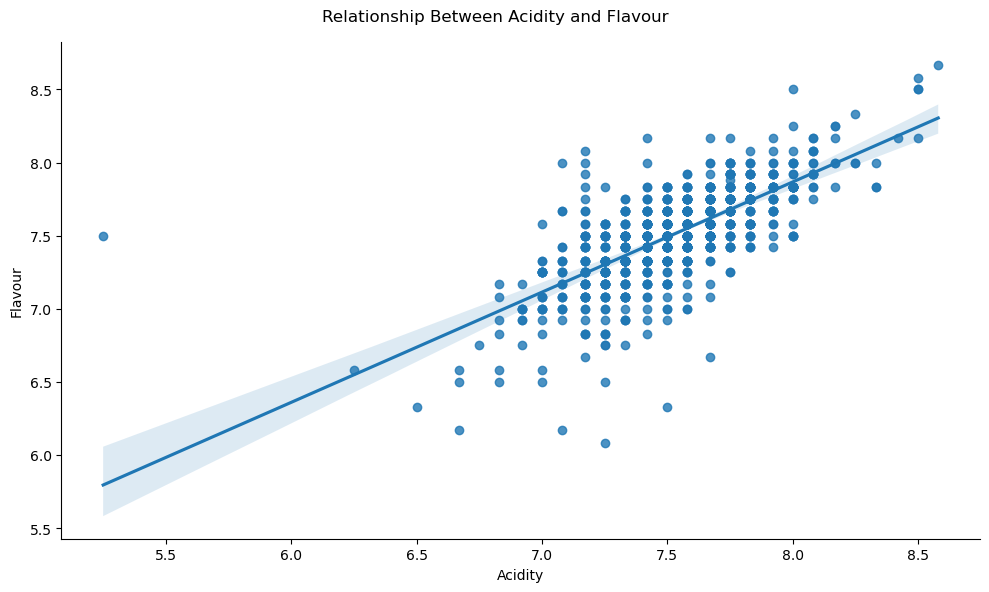

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling/visualisations/scatter_acidity_flavour.png


In [91]:
# Acidity & Flavor - 0.71
# sns.lmplot(x = 'Acidity', y = 'Flavor', data = df_matrix)
#plt.show()

# Acidity & Flavor - 0.71

# Create the regression plot
plot = sns.lmplot(x='Acidity', y='Flavor', data=df_matrix, height=6, aspect=10/6)

# Add title and axis labels
plot.set_axis_labels("Acidity", "Flavour")
plot.fig.suptitle("Relationship Between Acidity and Flavour")
plot.fig.tight_layout()

# Define export path
save_path = os.path.join(path, 'visualisations', 'scatter_acidity_flavour.png')

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plot.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

##### Comments
- Strong positive correlation.
- Many points clustered near the line indicating low degree of variance.
- Similar outlier pattern with more below the line, but one lies above the line at a low Acidity score, while Flavor scores high. <br><br>

## 3.4. Pair plot

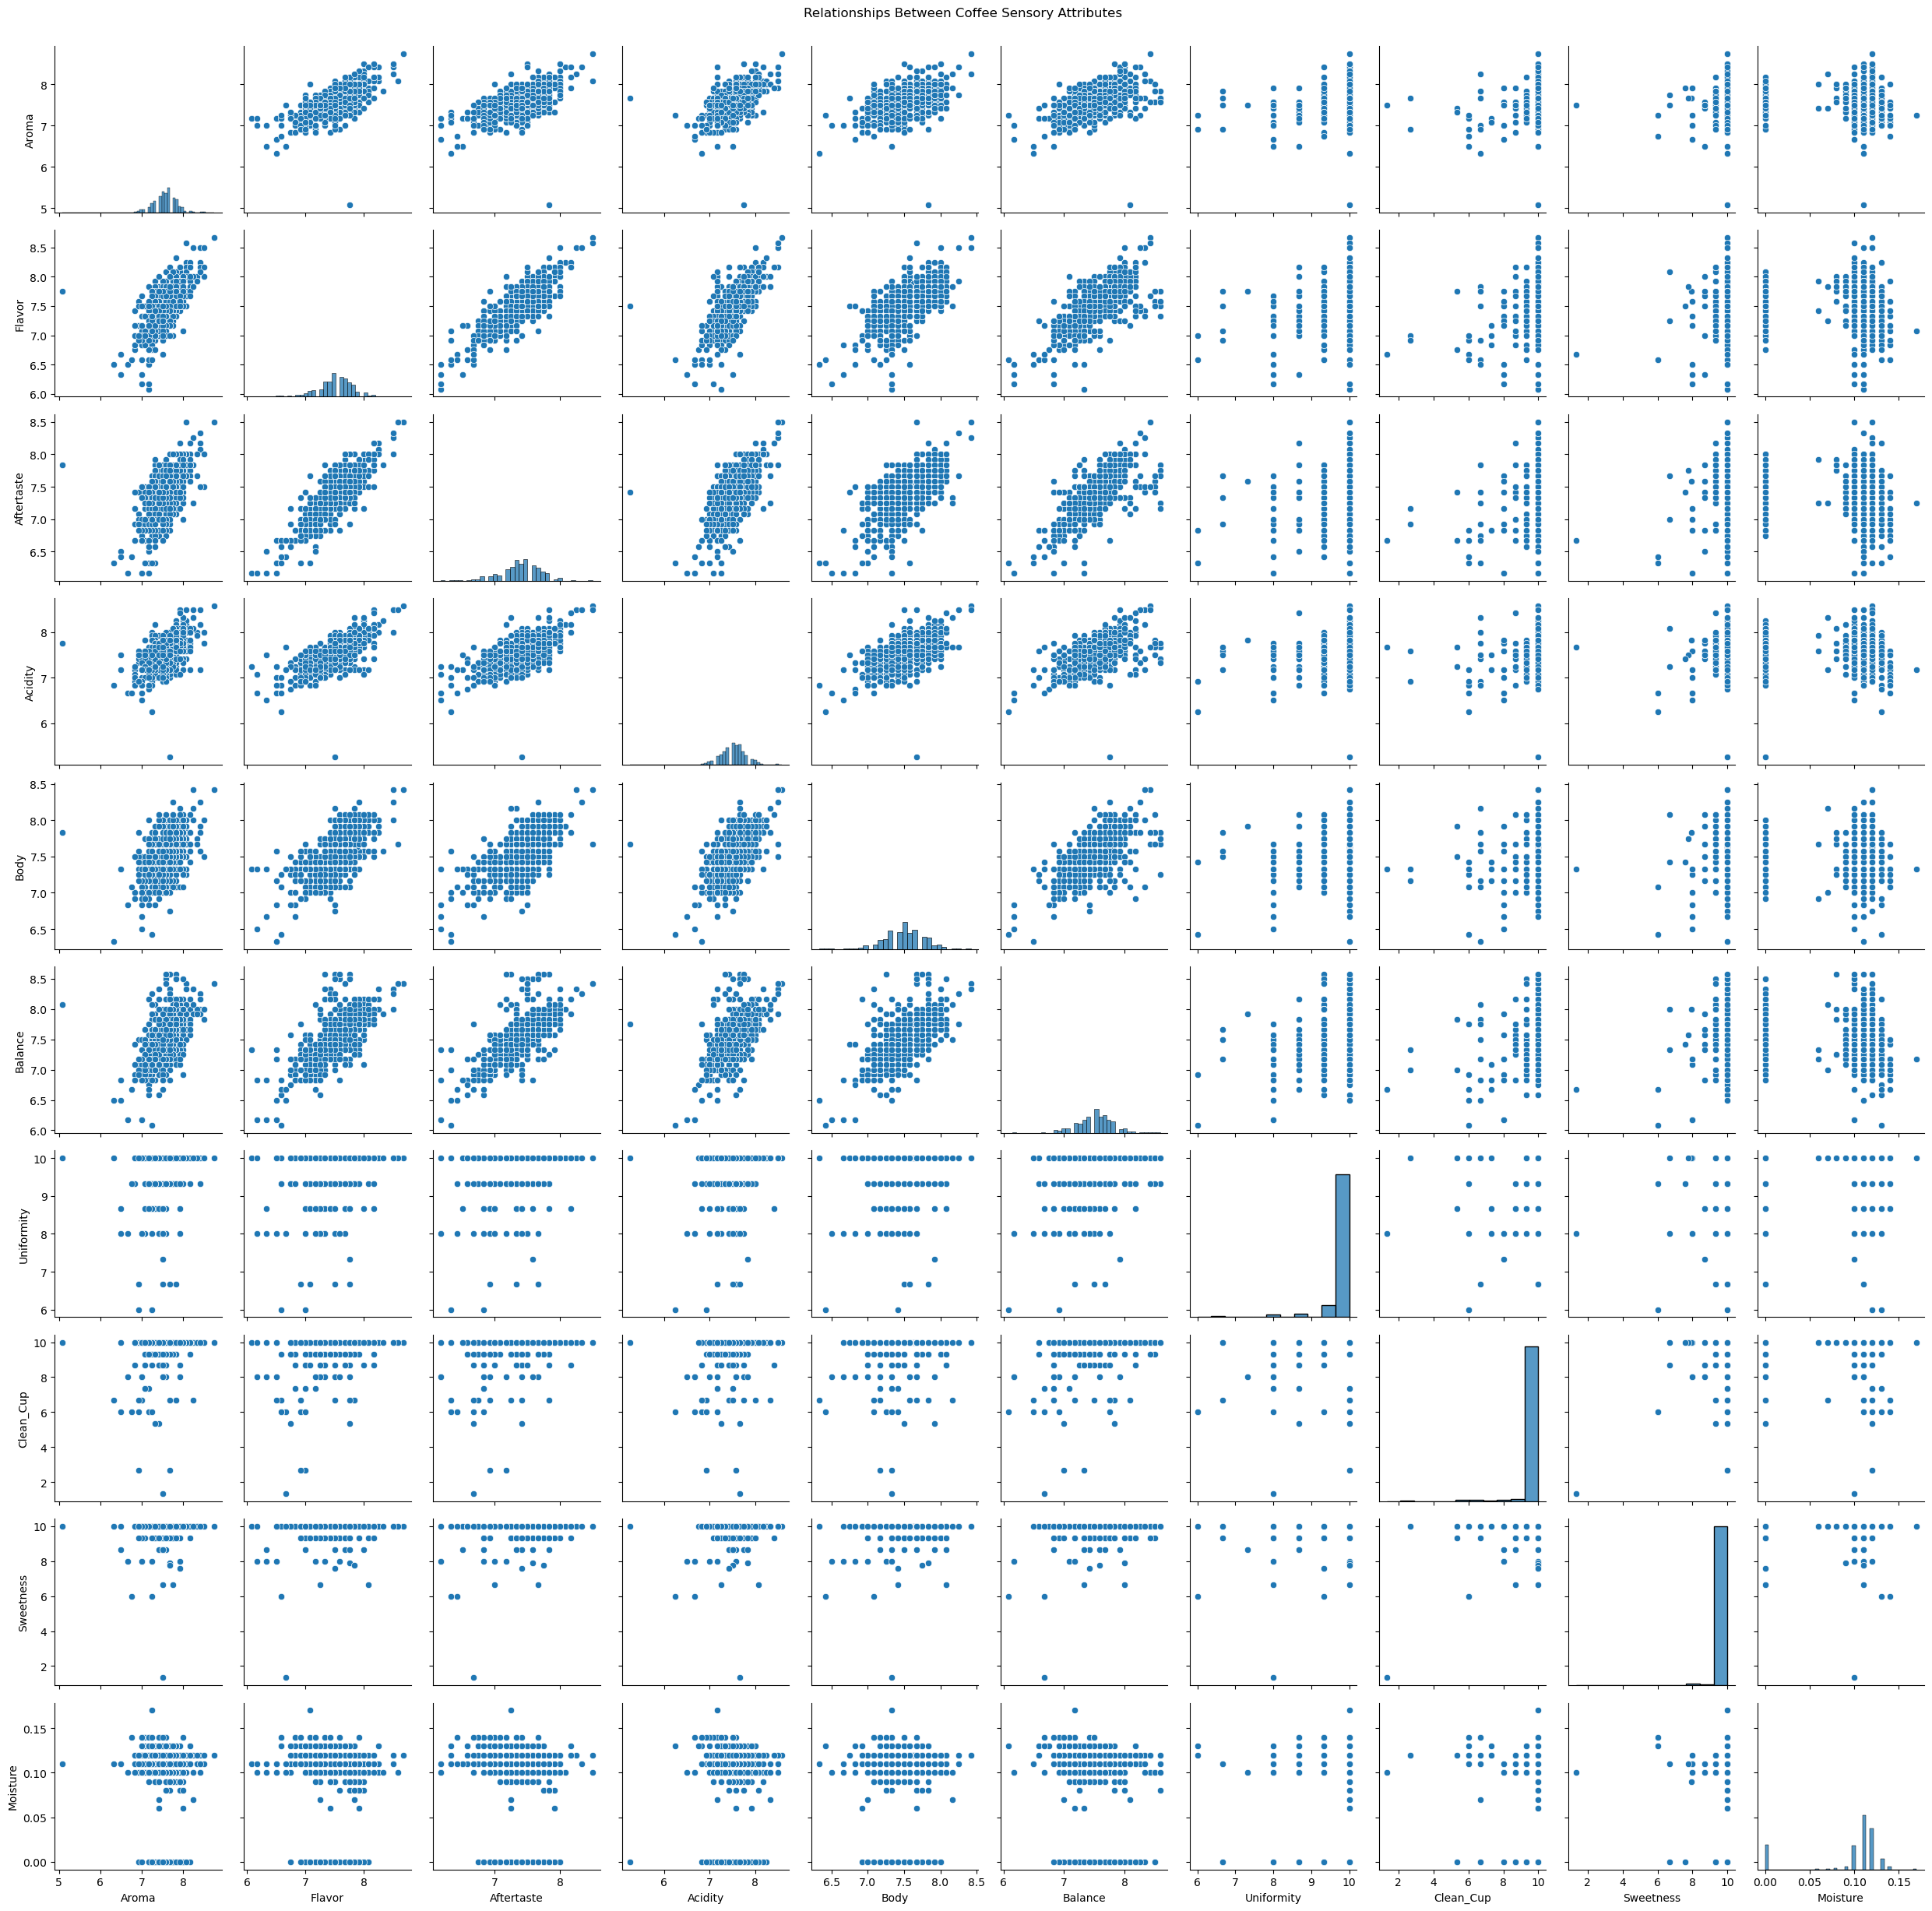

In [95]:
# Create subset with sensory evaluations
df_pair_plot = df_quality[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture']]

# Create the pair plot
pair_plot = sns.pairplot(df_pair_plot)

# Add a title manually (not supported directly via seaborn API)
pair_plot.fig.suptitle("Relationships Between Coffee Sensory Attributes")
pair_plot.fig.tight_layout()
pair_plot.fig.subplots_adjust(top=0.96)  # Adjust to make room for the title

# Define export path
save_path = os.path.join(path, 'visualisations', 'sensory_attributes_pairplot.png')

# Ensure directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
pair_plot.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

##### Variables: 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'
- Linear relationships with a strong correlation.
- Normal distribution.
- Suitable for further exploration through regression analysis, for example.

##### Variables: 'Uniformity', 'Clean_Cup', 'Sweetness'
- Non-linear relationships which form clusters along specific lines.
- Heavily left-skewed, with most scores concentrated at the top of the scale.
- Possible scoring bias.
- Explore alternative ways to investigate these relationships.

##### Variables: 'Moisture'
- Non-linear relationships which cluster in lines.
- Displays more of a normal distribution but is still heavily skewed to the left with a large number of outliers near the bottom of the scale.
- Explore alternative ways to investigate its relationship with other variables, or remove from the analysis. <br><br>

## 3.5. Categorical plots

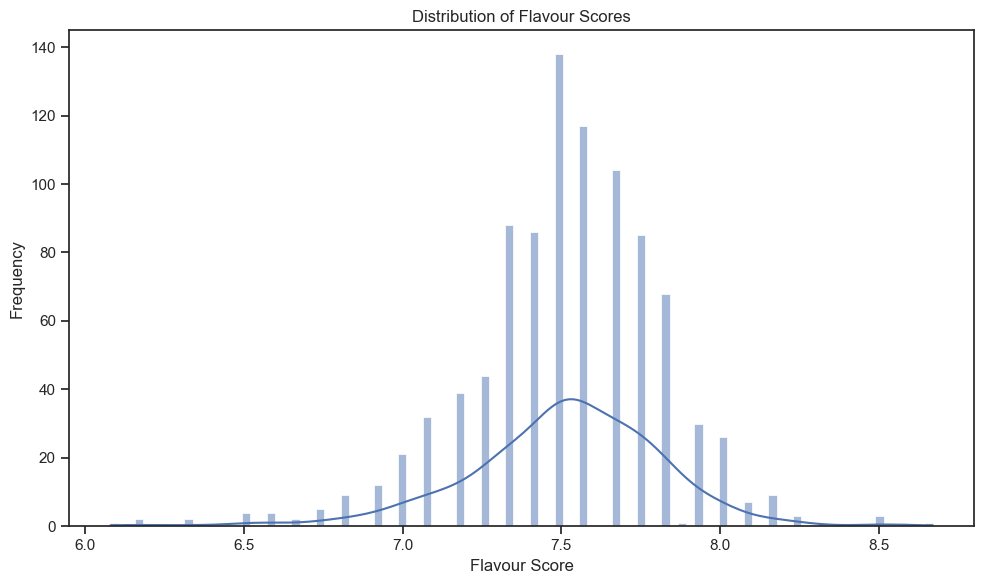

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling/visualisations/flavour_score_distribution.png


In [102]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_quality['Flavor'], bins=100, kde=True)

# Add labels and title
plt.title("Distribution of Flavour Scores")
plt.xlabel("Flavour Score")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Define export path
save_path = os.path.join(path, 'visualisations', 'flavour_score_distribution.png')

# Ensure directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation
print(f"Chart successfully saved at: {save_path}")

In [ ]:
# Copy dataframe
df_categorical = df_quality.copy()

# Create loop
result = []
for value in df_categorical['Flavor']:
    if value < 7.25:
        result.append('below average')
    elif 7.25 <= value <= 7.75:
        result.append('average')
    else:
        result.append('high')

# Create new variable
df_categorical['Flavor_category'] = result

In [99]:
# Frequency - new variable
df_categorical['Flavor_category'].value_counts(dropna = False)

Flavor_category
average          662
high             150
below average    133
Name: count, dtype: int64

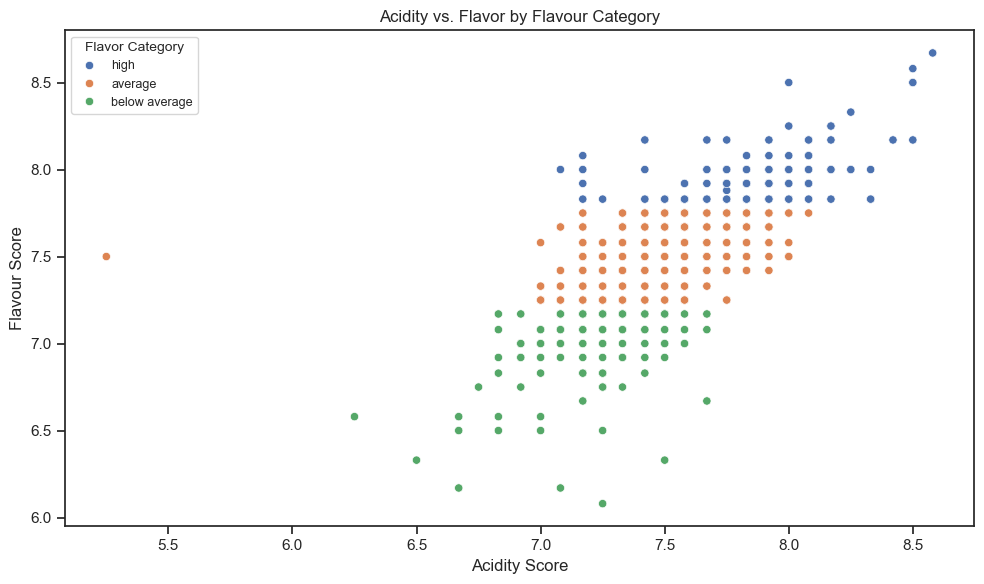

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling/visualisations/acidity_flavour_scatter.png


In [104]:
# Set style
sns.set(style="ticks")

# Create figure
plt.figure(figsize=(10, 6))

# Scatterplot
cat_scat_plot = sns.scatterplot(
    x="Acidity",
    y="Flavor",
    hue="Flavor_category",
    data=df_categorical
)

# Add labels and title
plt.title("Acidity vs. Flavor by Flavour Category")
plt.xlabel("Acidity Score")
plt.ylabel("Flavour Score")

# Improve legend title
plt.legend(title="Flavor Category", title_fontsize='10', fontsize='9')

# Adjust layout
plt.tight_layout()

# Define export path
save_path = os.path.join(path, 'visualisations', 'acidity_flavour_scatter.png')

# Ensure directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation
print(f"Chart successfully saved at: {save_path}")

##### Previous insights
- Strong positive correlation.
- Many points clustered near the line indicating low degree of variance.
- Similar outlier pattern with more below the line, but one lies above the line at a low Acidity score, while Flavor scores high.

##### Further comments
- Flavor category supports the correlation, with higher flavor scores at the higher range of acidity scores.
- Consistency suggests predictability.
- One outlier could be due to unique characteristics, or an error.<br><br>